In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model

In [3]:
df=pd.read_csv("Ecommerce_Customers.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
df.shape

(500, 8)

In [ ]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [ ]:
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Data Preprocessing:

In [ ]:
display(df.isnull().any())

Email                   False
Address                 False
Avatar                  False
Avg Session Length      False
Time on App             False
Time on Website         False
Length of Membership    False
Yearly Amount Spent     False
dtype: bool

In [5]:
#dropping the non-significant columns
import pandas as pd
df.drop(['Email', 'Avatar', 'Address'], axis=1, inplace=True)


In [6]:
print(df)


     Avg Session Length  Time on App  Time on Website  Length of Membership  \
0             34.497268    12.655651        39.577668              4.082621   
1             31.926272    11.109461        37.268959              2.664034   
2             33.000915    11.330278        37.110597              4.104543   
3             34.305557    13.717514        36.721283              3.120179   
4             33.330673    12.795189        37.536653              4.446308   
..                  ...          ...              ...                   ...   
495           33.237660    13.566160        36.417985              3.746573   
496           34.702529    11.695736        37.190268              3.576526   
497           32.646777    11.499409        38.332576              4.958264   
498           33.322501    12.391423        36.840086              2.336485   
499           33.715981    12.418808        35.771016              2.735160   

     Yearly Amount Spent  
0             587.951054

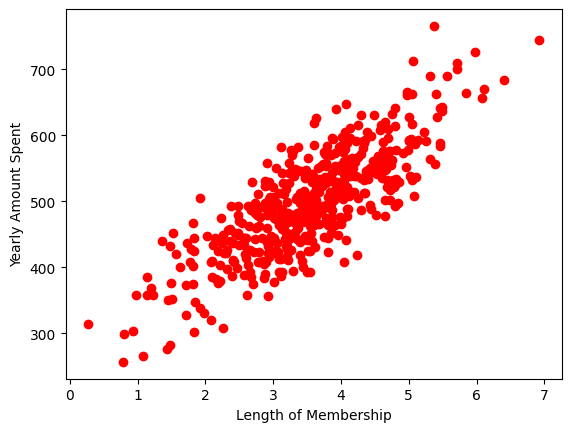

In [ ]:
import matplotlib.pyplot as plt
plt.scatter([df["Length of Membership"]], df[["Yearly Amount Spent"]],  color='red')
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.show()


<Axes: >

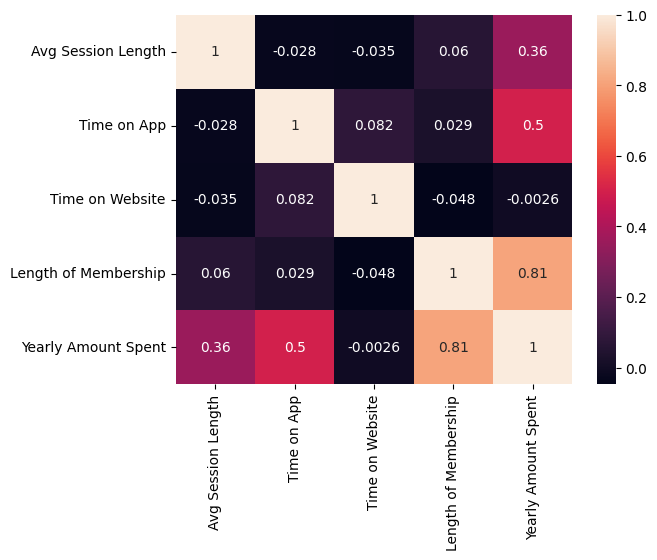

In [8]:
import seaborn as sns
correlation_matrix = df.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)


In [ ]:
# --- Get the 3 most correlated features. ---
print(df.corr().abs().nlargest(3, 'Yearly Amount Spent').index)

# --- Print the 3 largest correlation values. ---
print(df.corr().abs().nlargest(3, 'Yearly Amount Spent').values[:,4])


Index(['Yearly Amount Spent', 'Length of Membership', 'Time on App'], dtype='object')
[1.         0.80908357 0.49932777]


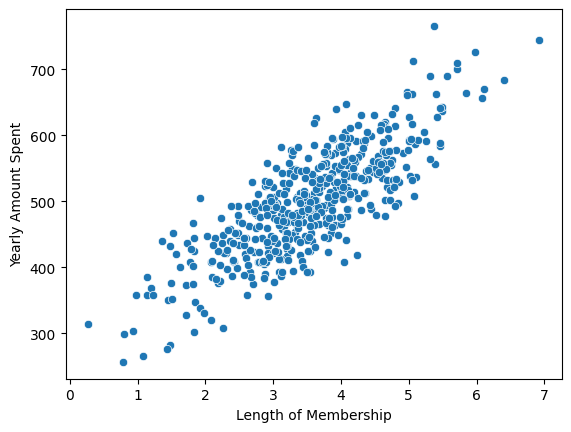

In [ ]:
sns.scatterplot(x='Length of Membership', y='Yearly Amount Spent', data=df)

plt.show()

Text(0, 0.5, 'Yearly Amount Spent')

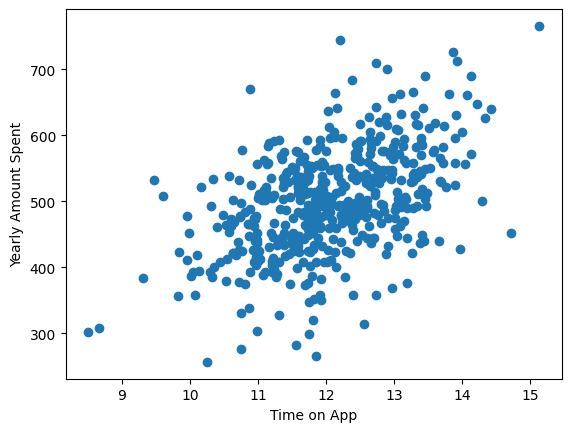

In [ ]:
plt.scatter(df['Time on App'], df['Yearly Amount Spent'], marker='o')

plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')

In [10]:
#Selectionner tout les features sauf la cible
X_reg = df.iloc[:, :-1]
# La dernière colonne est considérée comme votre variable cible Y_reg
y_reg = df.iloc[:, -1]
print(X_reg.shape)
print(df.shape)
print(X_reg.head())

(500, 4)
(500, 5)
   Avg Session Length  Time on App  Time on Website  Length of Membership
0           34.497268    12.655651        39.577668              4.082621
1           31.926272    11.109461        37.268959              2.664034
2           33.000915    11.330278        37.110597              4.104543
3           34.305557    13.717514        36.721283              3.120179
4           33.330673    12.795189        37.536653              4.446308


In [11]:
from sklearn.model_selection import train_test_split
# Use the function train_test_split to create your train and test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg,
                                                                    test_size=0.20,
                                                                    random_state=123)




Normalisation des données:

In [12]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler function
scaler = StandardScaler()

# Fit the StandardScaler on the trainig set
scaler.fit(X_train_reg)

# Standardization of the training set
X_train_reg_norm = scaler.transform(X_train_reg)

# Standardization of the validation set
X_test_reg_norm = scaler.transform(X_test_reg)


In [34]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression()

# Classic linear regression
reg.fit(X_train_reg_norm, y_train_reg)

print('Intercept value:', reg.intercept_)
print('Coefficient values:', reg.coef_)


# Use the model to make predictions on the test set
y_test_reg_prediction = reg.predict(X_test_reg_norm)

print("The model performance of the Classic linear regression")
print("--------------------------------------")

# Calculate the R^2 score of the model on the test set
score = r2_score(y_test_reg, y_test_reg_prediction)
print('R^2 score: %.4f' % score)

# Calculate the MSE
mse = mean_squared_error(y_test_reg, y_test_reg_prediction)
print('MSE: %.4f' % mse)

Intercept value: 499.63634858046663
Coefficient values: [25.91878797 38.8825524   0.49224113 59.5870564 ]
The model performance of the Classic linear regression
--------------------------------------
R^2 score: 0.9851
MSE: 102.3955


In [15]:
from sklearn.linear_model import Lasso
# Importation of the performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lasso = Lasso(alpha=0.1, random_state=123)
# Lasso regression
lasso.fit(X_train_reg_norm, y_train_reg)
# Lasso regression
y_test_lasso_prediction = lasso.predict(X_test_reg_norm)
print ('coef : ' , lasso.coef_)
print ('intercept : ',  lasso.intercept_)

print("The model performance of the Lasso regression")
print("--------------------------------------")
# Calculate the R^2 score of the model on the test set
score = lasso.score(X_test_reg_norm, y_test_reg)
print('R-2 : %.4f' % score)
mse = mean_squared_error(y_test_reg, y_test_lasso_prediction)
print('MSE : %.4f'% mse)

coef :  [25.81753936 38.79222211  0.39780643 59.49625462]
intercept :  499.63634858046663
The model performance of the Lasso regression
--------------------------------------
R-2 : 0.9851
MSE : 102.4816


In [16]:
from sklearn.linear_model import Ridge
# Importation of the performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
ridge = Ridge(alpha=0.2, random_state=123)
# Ridge regression
ridge.fit(X_train_reg_norm, y_train_reg)
# Ridge regression
y_test_ridge_prediction = ridge.predict(X_test_reg_norm)

print("The model performance of the Ridge regression")
print("--------------------------------------")
# Calculate the R^2 score of the model on the test set
score = ridge.score(X_test_reg_norm, y_test_reg)
print('R-2 : %.4f' % score)
mse = mean_squared_error(y_test_reg, y_test_ridge_prediction)
print('MSE : %.4f'% mse)

The model performance of the Ridge regression
--------------------------------------
R-2 : 0.9851
MSE : 102.4103


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Add polynomial features to the data
poly = PolynomialFeatures(degree=2)
X_reg_poly = poly.fit_transform(X_reg)

# Print out the names of the polynomial features
print(poly.get_feature_names_out(['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership']))

# Split the data into training and test sets
X_train_reg_poly, X_test_reg_poly, y_train_reg, y_test_reg = train_test_split(X_reg_poly, y_reg,
                                                                            test_size=0.20,
                                                                            random_state=123)

# Initialize the StandardScaler function
scaler = StandardScaler()

# Fit the StandardScaler on the training set
scaler.fit(X_train_reg_poly)

# Standardization of the training set
X_train_reg_poly_norm = scaler.transform(X_train_reg_poly)

# Standardization of the validation set
X_test_reg_poly_norm = scaler.transform(X_test_reg_poly)

# Initialize the linear regression model
reg_poly = LinearRegression()

# Fit the model to the training data
reg_poly.fit(X_train_reg_poly_norm, y_train_reg)

# Use the model to make predictions on the test set
y_pred_reg_poly = reg_poly.predict(X_test_reg_poly_norm)

# Print the coefficients of the polynomial regression model
print(reg_poly.coef_)

# Print the model performance of the Polynomial regression
print("The model performance of the Polynomial regression")
print("--------------------------------------")

# Calculate the R^2 score of the model on the test set
score = reg_poly.score(X_test_reg_poly_norm, y_test_reg)
print('R-2 : %.4f' % score)

# Calculate the mean squared error of the model on the test set
mse = mean_squared_error(y_test_reg, y_pred_reg_poly)
print('MSE : %.4f' % mse)


['1' 'Avg Session Length' 'Time on App' 'Time on Website'
 'Length of Membership' 'Avg Session Length^2'
 'Avg Session Length Time on App' 'Avg Session Length Time on Website'
 'Avg Session Length Length of Membership' 'Time on App^2'
 'Time on App Time on Website' 'Time on App Length of Membership'
 'Time on Website^2' 'Time on Website Length of Membership'
 'Length of Membership^2']
[  0.          56.67490394  57.69428904 -12.83290077  88.00491686
 -29.75537115  -3.32598403   2.93811112 -18.29568583   6.53740437
 -23.58591816  -1.3445638   19.43160305  -9.00401546  -0.09648495]
The model performance of the Polynomial regression
--------------------------------------
R-2 : 0.9850
MSE : 103.2322


Intérprétation des résultats et conclusion:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for comparison
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Polynomial Regression'],
    'R^2 Score': [0.9851, 0.9851, 0.9851, 0.9850],
    'MSE': [102.3955, 102.4816, 102.4103, 103.2322]

})
print (results)
# Conclusion
print("\nConclusion:")
print("All models (Linear, Lasso, Ridge, Polynomial) have very similar R^2 scores, indicating they explain the variation in the target variable similarly.")
print("The MSE (Mean Squared Error) is slightly higher for the Polynomial Regression model compared to the other models, indicating slightly worse performance in terms of prediction accuracy.")
print("Overall, considering the similarities in R^2 scores and MSE, any of these models can be considered suitable for predicting Yearly Amount Spent based on the provided features.")


                   Model  R^2 Score       MSE
0      Linear Regression     0.9851  102.3955
1       Lasso Regression     0.9851  102.4816
2       Ridge Regression     0.9851  102.4103
3  Polynomial Regression     0.9850  103.2322

Conclusion:
All models (Linear, Lasso, Ridge, Polynomial) have very similar R^2 scores, indicating they explain the variation in the target variable similarly.
The MSE (Mean Squared Error) is slightly higher for the Polynomial Regression model compared to the other models, indicating slightly worse performance in terms of prediction accuracy.
Overall, considering the similarities in R^2 scores and MSE, any of these models can be considered suitable for predicting Yearly Amount Spent based on the provided features.
